In [1]:
import pandas  as  pd

In [2]:
df =  pd.read_csv('iris.csv')

In [3]:
df.head()

,sepal length,sepal width,petal length,petal width,label
0,5.2,3.8,1.5,0.3,Iris-setosa
1,5.3,4.1,1.5,0.1,Iris-setosa
2,4.8,3.1,1.5,0.2,Iris-setosa
3,5.2,3.7,1.5,0.2,Iris-setosa
4,4.9,3.0,1.5,0.3,Iris-setosa


In [4]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
label           0
dtype: int64

In [7]:
# ! pip  install matplotlib

In [8]:
import matplotlib.pyplot as plt


<Axes: title={'center': 'petal width'}, xlabel='label'>

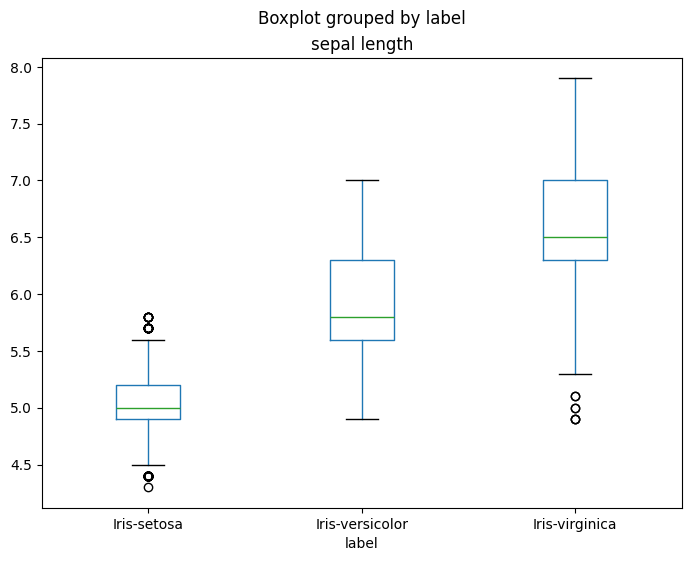

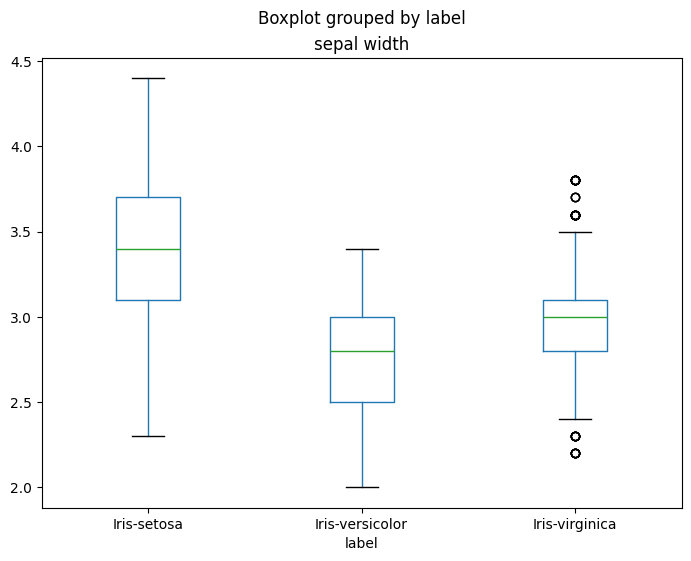

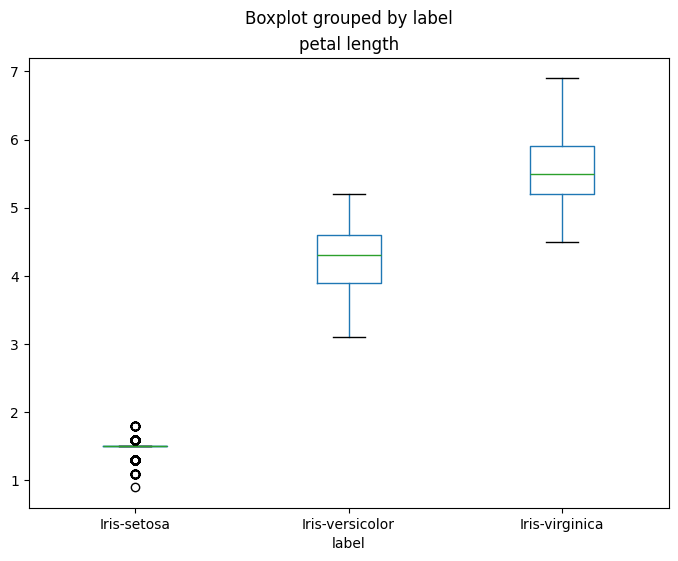

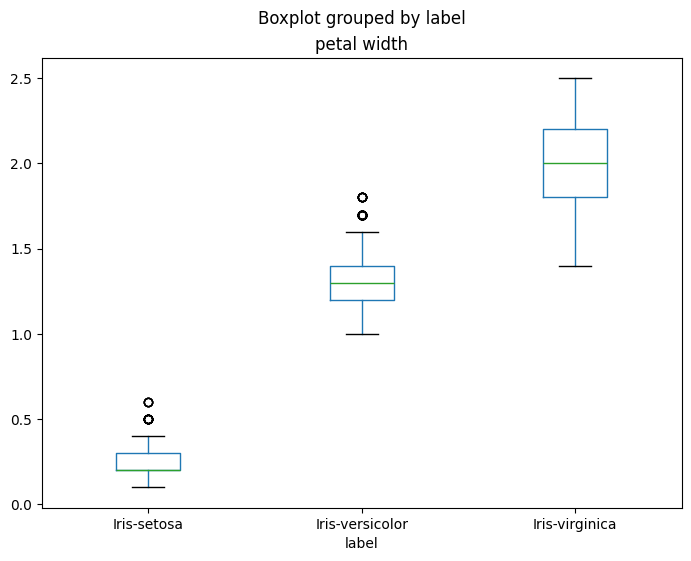

In [13]:
#boxplot
df.boxplot(column='sepal length', by='label', grid=False, figsize=(8, 6))
df.boxplot(column='sepal width', by='label', grid=False, figsize=(8, 6))
df.boxplot(column='petal length', by='label', grid=False, figsize=(8, 6))
df.boxplot(column='petal width', by='label', grid=False, figsize=(8, 6))

In [19]:
from  sklearn.model_selection  import  train_test_split

train , test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])
train.shape, test.shape

((2400, 5), (600, 5))

In [20]:
from  sklearn.preprocessing  import  StandardScaler
scaler = StandardScaler()

In [21]:
from  sklearn.linear_model  import  LogisticRegression
from  sklearn.metrics  import  accuracy_score, classification_report, confusion_matrix
from  sklearn.pipeline  import  make_pipeline

model = make_pipeline(scaler, LogisticRegression(max_iter=1000))
model.fit(train.drop('label', axis=1), train['label'])
predictions = model.predict(test.drop('label', axis=1))
accuracy = accuracy_score(test['label'], predictions)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(test['label'], predictions))
print(confusion_matrix(test['label'], predictions))


Accuracy: 0.99
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00       200
Iris-versicolor       1.00      0.98      0.99       200
 Iris-virginica       0.99      1.00      0.99       200

       accuracy                           0.99       600
      macro avg       1.00      0.99      0.99       600
   weighted avg       1.00      0.99      0.99       600

[[200   0   0]
 [  0 197   3]
 [  0   0 200]]


In [22]:
from  sklearn.tree  import  DecisionTreeClassifier

model = make_pipeline(scaler, DecisionTreeClassifier(random_state=42))
model.fit(train.drop('label', axis=1), train['label'])
predictions = model.predict(test.drop('label', axis=1))
accuracy = accuracy_score(test['label'], predictions)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(test['label'], predictions))
print(confusion_matrix(test['label'], predictions))



Accuracy: 1.00
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00       200
Iris-versicolor       1.00      1.00      1.00       200
 Iris-virginica       1.00      1.00      1.00       200

       accuracy                           1.00       600
      macro avg       1.00      1.00      1.00       600
   weighted avg       1.00      1.00      1.00       600

[[200   0   0]
 [  0 200   0]
 [  0   0 200]]


In [24]:
# make cross-validation
from  sklearn.model_selection  import  cross_val_score
from  sklearn.model_selection  import  StratifiedKFold

model = make_pipeline(scaler, DecisionTreeClassifier(random_state=42))
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, df.drop('label', axis=1), df['label'], cv=cv, scoring='accuracy')
print(f'Cross-validation accuracy: {scores.mean():.2f} ± {scores.std():.2f}')


Cross-validation accuracy: 1.00 ± 0.00
